In this file, we will go through the Ridge and Lasso Regression in Machine Learning and how to implement it.

The Ridge and Lasso regression models are regularized linear models which are a good way to reduce overfitting and to regularize the model: the less degrees of freedom it has, the harder it will be to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is usually done by constraining the model weights. We will now look at the Ridge regression and lasso regression, which implement the different ways of constraining weights.

### Ridge Regression

Ridge regression is a regularized version of linear regression. This forces the training algorithm not only to fit the data but also to keep the model weights as small as possible.

Note that the accrual term should only be added to the cost function during training. After we train the model, you want to use the unregulated performance measure to evaluate the performance of the model.

### Lasso Regression

Least absolute shrinkage and selection operator regression (usually just called **lasso regression**) is another regularized version of linear regression: just like peak regression, it adds a regularization term to the cost function. , but it uses the **ℓ1 norm** of the weight vector instead of half the **square of the ℓ2 norm**.

### Ridge and Lasso Regression 

To show the implementation of Ridge and Lasso Regression, we will start with importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now let’s import the data and do some data cleaning

In [2]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Now we will remove the unnamed column:

In [4]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

We only have three advertising media and sales are our target variable. Let’s see how each variable affects sales by creating a scatter plot. First, we build a helper function to create a scatter plot:

In [5]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 18))
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

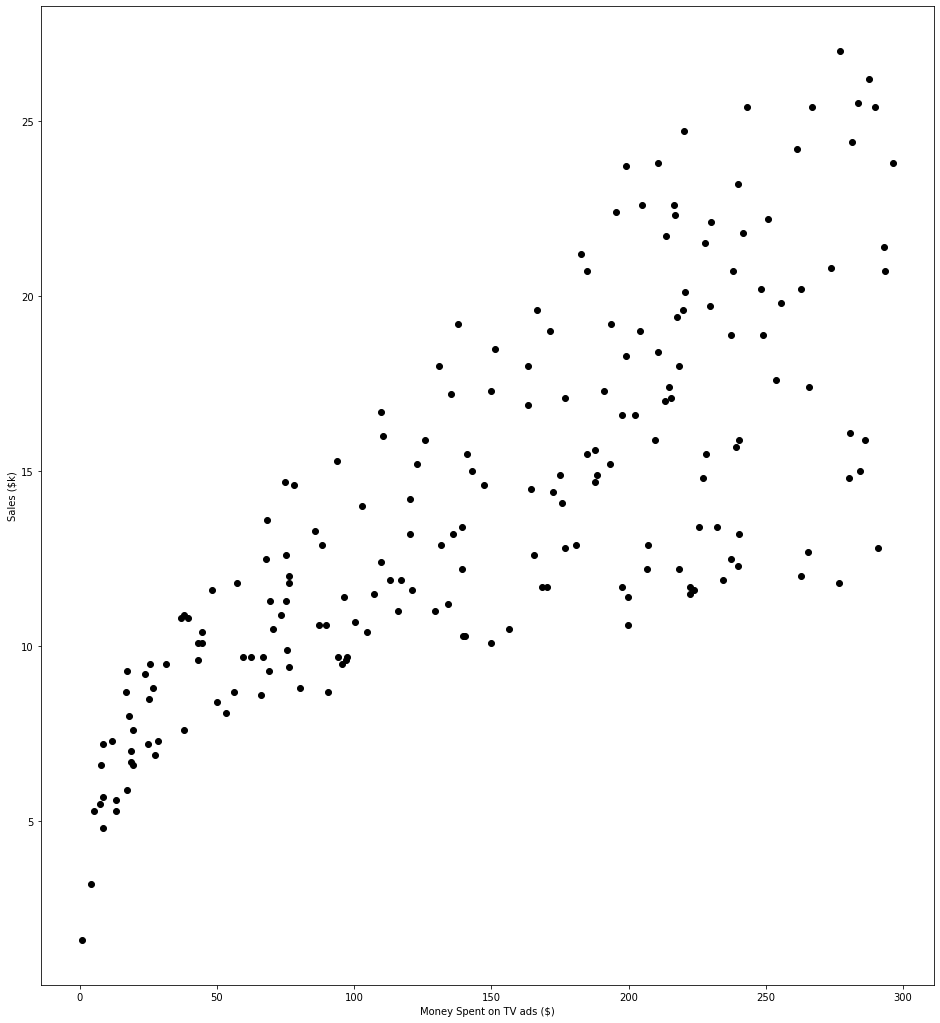

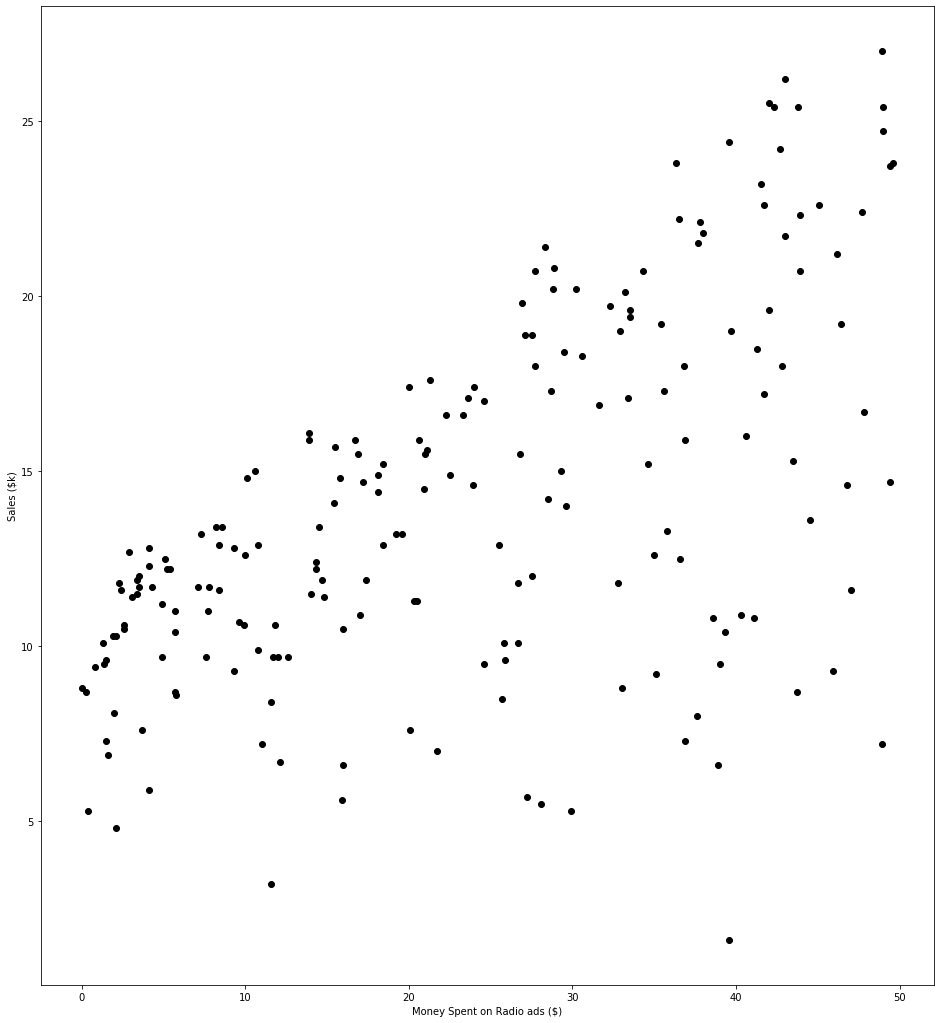

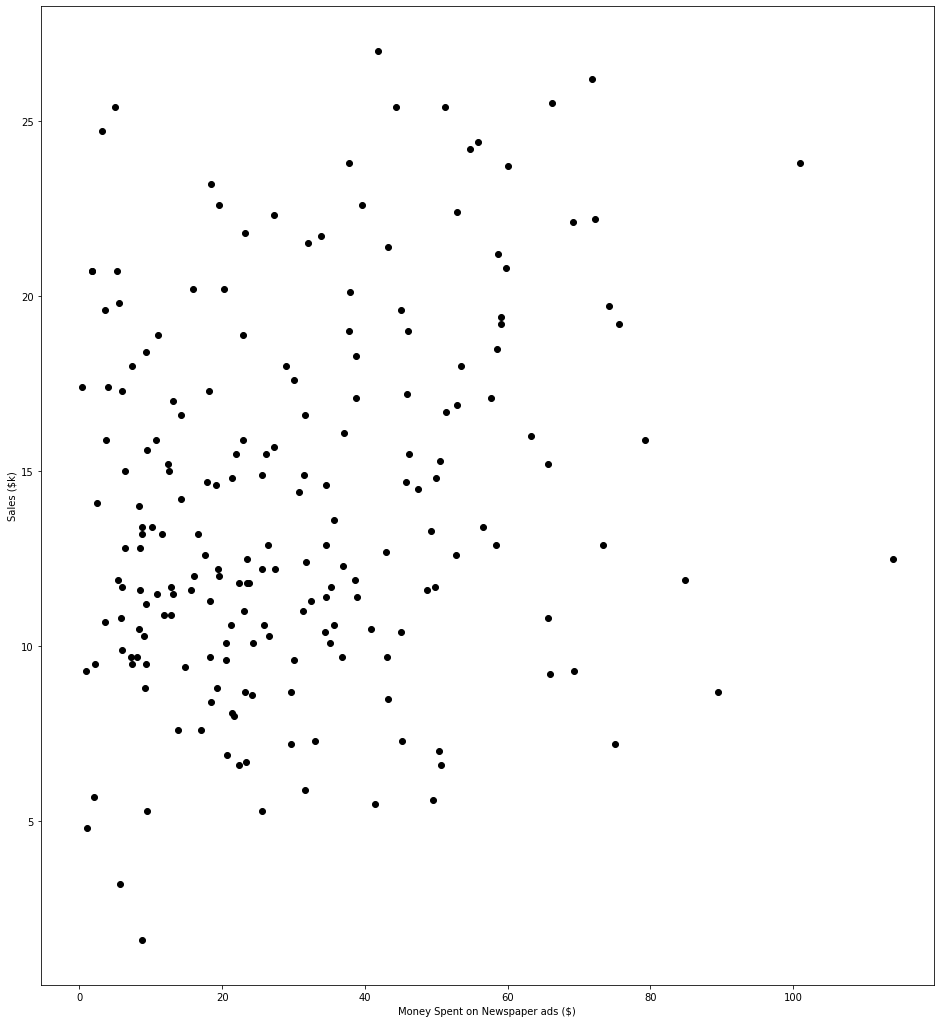

In [6]:
scatter_plot("TV", "Sales")
scatter_plot("Radio", "Sales")
scatter_plot("Newspaper", "Sales")

### Multiple Linear Regression Algorithm

As Ridge and Lasso Regression models are a way of regularizing the linear models so we first need to prepare a linear model. Let’s code for preparing a multiple linear regression model:

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

xs = data.drop(["Sales"], axis=1)
y = data["Sales"].values.reshape(-1,1)
linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring="neg_mean_squared_error", cv=5)

mean_MSE = np.mean(MSE)
mean_MSE

-3.07294659710021

Now, we need to see what’s better Ridge Regression or Lasso Regression.

### Ridge Regression

For the ridge regression algorithm, we will use **GridSearchCV model provided by Scikit-learn**, which will allow us to automatically perform the 5-fold cross-validation to find the optimal value of alpha.

This is how the code looks like for the Ridge Regression algorithm:

In [8]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

And then we can easily find the best parameter and the best MSE by using the following commands:

In [9]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-3.072671338341143


### Lasso Regression

For the Lasso Regression also we need to follow the same process as we did in the Ridge Regression. This is how the code looks like:

In [10]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(xs, y)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.6330184067651, tolerance: 0.43829494374999994
  positive)
C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.2169839442834, tolerance: 0.45029244375
  positive)
C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.3201080483578, tolerance: 0.41992074374999994
  positive)


{'alpha': 1}
-3.041405896751369


This is how to implement Ridge and Lasso regression in machine learning. In this case, the lasso is the best method of adjustment, with a regularization value of **1**.